In [1]:
from proveit.number.arithmeticOps import *
#from proveit.number.real.theorems import *
from proveit.number.real.theorems import divIneqThm1, divIneqThm1cor, ineqThm3, ineqThm4a, ineqThm4b, ineqThm9
from proveit.number.complex.theorems import absProd, absProdEtc
from proveit.number.relation import Relation
from proveit.basiclogic import In
from proveit.statistics import Prob

In [2]:
from proveit.number.real.theorems import absTwoPi, absPos

In [3]:
from proveit.number.complex.theorems import multAssoc
from proveit.number.integer.theorems import sumIneq1, sumIneq2

In [4]:
error_prob = Prob(GreaterThan(Abs(Subtract(m,b)),eps))
alpha_l = Operation(Variable('alpha',{STRING:'alpha',LATEX:r'\alpha'}),l)

In [5]:
abs_alpha_l_sq_bound = LessThanEquals(Exponentiate(Abs(alpha_l),two),
                        Fraction(one,
                                 Multiply(four, Exponentiate(Subtract(l, Multiply(Exponentiate(two,t),delta)),two))))

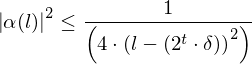

In [6]:
abs_alpha_l_sq_bound

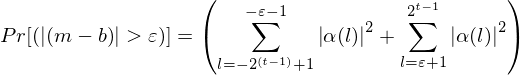

In [12]:
Expr = Equals(error_prob, Add(Summation(l,Exponentiate(Abs(alpha_l),two),DiscreteContiguousSet(Add(Neg(Exponentiate(two,Subtract(t,one))),one),Subtract(Neg(eps),one))), 
                Summation(l,Exponentiate(Abs(alpha_l),two),DiscreteContiguousSet(Add(eps,one), Exponentiate(two,Subtract(t,one))))))
Expr

In [8]:
assumptions = {abs_alpha_l_sq_bound}

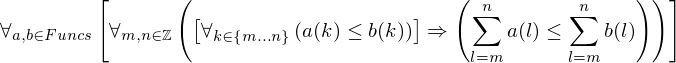

In [9]:
sumIneq1

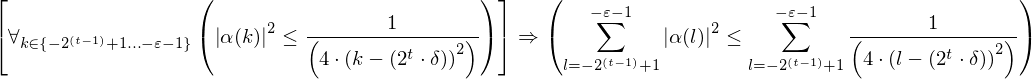

In [10]:
Y1 = sumIneq1.specialize({Operation(a,l):Exponentiate(Abs(alpha_l),two), Operation(b,l):abs_alpha_l_sq_bound.rhs}).specialize({m:Add(Neg(Exponentiate(two,Subtract(t,one))),one), n:Subtract(Neg(eps),one)})
Y1

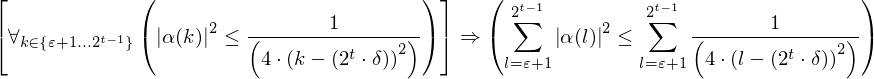

In [13]:
Y2 = sumIneq1.specialize({Operation(a,l):Exponentiate(Abs(alpha_l),two), Operation(b,l):abs_alpha_l_sq_bound.rhs}).specialize({m:Add(eps,one), n:Exponentiate(two,Subtract(t,one))})
Y2

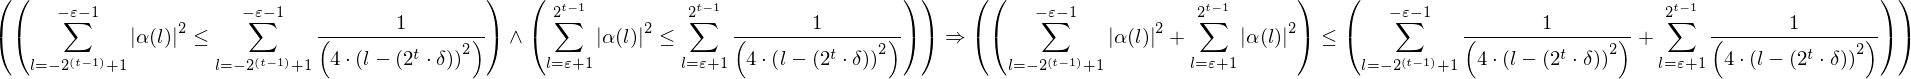

In [19]:
Y3 = sumIneq2.specialize({a:Expr.rhs.operands[0], b:Expr.rhs.operands[1], c:Y1.conclusion.rhs, d:Y2.conclusion.rhs})
Y3

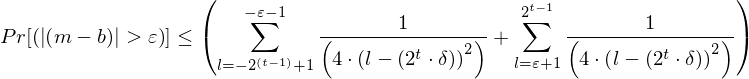

In [22]:
X1 = Relation(Expr).update(Y3.conclusion)
X1

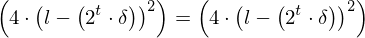

In [37]:
X1.rhs.operands[0].summand.denominator.factor(four)

In [26]:
assumptions.union({Y1,Y2,Y3})
assumptions.union({In(Exponentiate(Abs(alpha_l),two),Funcs),
                   In(abs_alpha_l_sq_bound.rhs, Funcs), 
                   In(Add(Neg(Exponentiate(two,Subtract(t,one))),one),Integers),
                   In(Subtract(Neg(eps),one), Integers),
                   In(Add(eps,one), Integers),
                   In(Exponentiate(two,Subtract(t,one)), Integers),
                   In(Expr.rhs.operands[0], Reals),
                   In(Expr.rhs.operands[1], Reals),
                   In(Y1.conclusion.rhs, Reals),
                   In(Y2.conclusion.rhs, Reals)})

{Pr[(|(m - b)| > eps)],
 |alpha(l)|^(2) <= 1 / (4 * (l - (2^(t) * delta))^(2)),
 |alpha(l)|^(2) in Funcs,
 1 / (4 * (l - (2^(t) * delta))^(2)) in Funcs,
 (-2^((t - 1)) + 1) in Integers,
 (-eps - 1) in Integers,
 (eps + 1) in Integers,
 2^((t - 1)) in Integers,
 Summation_{l=-2^((t - 1)) + 1}^{-eps - 1}|alpha(l)|^(2) in Reals,
 Summation_{l=eps + 1}^{2^(t - 1)}|alpha(l)|^(2) in Reals,
 Summation_{l=-2^((t - 1)) + 1}^{-eps - 1}1 / (4 * (l - (2^(t) * delta))^(2)) in Reals,
 Summation_{l=eps + 1}^{2^(t - 1)}1 / (4 * (l - (2^(t) * delta))^(2)) in Reals}

In [27]:
X1.proven(assumptions)

ProofFailure: Proof failed: Pr[(|(m - b)| > eps)] <= (Summation_{l=-2^((t - 1)) + 1}^{-eps - 1}1 / (4 * (l - (2^(t) * delta))^(2)) + Summation_{l=eps + 1}^{2^(t - 1)}1 / (4 * (l - (2^(t) * delta))^(2))) assuming {|alpha(l)|^(2) <= 1 / (4 * (l - (2^(t) * delta))^(2)), Pr[(|(m - b)| > eps)]}

In [8]:
abs_alpha_l.rhs.numerator.operand.rightOperand.exponent.factor(i)

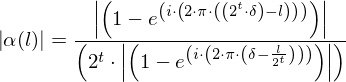

In [9]:
X1 = abs_alpha_l.rhs.numerator.operand.rightOperand.exponent.factor(i).rhsSubstitute(abs_alpha_l)
X2 = X1.rhs.denominator.operands[1].operand.rightOperand.exponent.factor(i).rhsSubstitute(X1)
X2

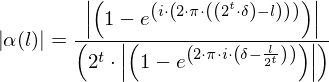

In [10]:
X1.proven(assumptions)

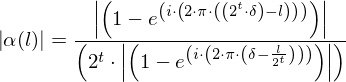

In [11]:
X2.proven(assumptions)

In [16]:
assumptions = assumptions.union({X2})

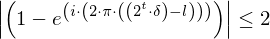

In [11]:
X3 = ineqThm9.specialize({theta:X2.rhs.numerator.operand.operands[1].exponent.operands[1]})
X3

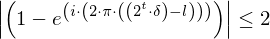

In [12]:
assumptions = assumptions.union({In(X3.lhs.operand.operands[1].exponent.operands[1],Reals)})
X3.proven(assumptions)

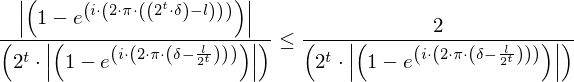

In [13]:
X4 = divIneqThm1.specialize({a:X3.lhs,b:X2.rhs.denominator,c:X3.rhs})
X4

In [14]:
assumptions = assumptions.union({GreaterThan(X2.rhs.denominator,zero),
                                 In(X3.lhs,Reals),
                                 In(X3.rhs,Reals),
                                 In(X2.rhs.denominator,Reals)})

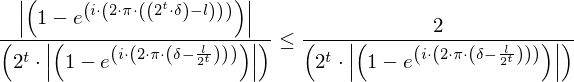

In [15]:
X4.proven(assumptions)

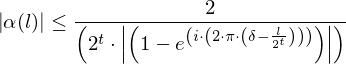

In [16]:
X5 = Relation(X2).update(X4)
X5.proven(assumptions)

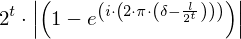

In [17]:
X5.rhs.denominator

In [18]:
assumptions = assumptions.union({In(l,Integers),In(t,Naturals),In(delta,Reals),
                                                    LessThanEquals(Neg(Exponentiate(two,Subtract(t,one))),l),
                                                    LessThanEquals(l,Exponentiate(two,Subtract(t,one))),
                                                    LessThanEquals(zero,delta),
                                                    LessThanEquals(delta,Exponentiate(two,Neg(t)))})

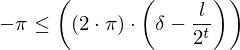

In [19]:
X6 = ineqThm4a.specialize().proven(assumptions)
X6

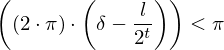

In [20]:
X7 = ineqThm4b.specialize().proven(assumptions)
X7

In [21]:
assumptions = assumptions.union({X6,X7})
assumptions

{|alpha(l)| = |(1 - e^((2 * pi * i * ((2^(t) * delta) - l))))| / (2^(t) * |(1 - e^((2 * pi * i * (delta - l / 2^(t)))))|),
 (2 * pi * ((2^(t) * delta) - l)) in Reals,
 (2^(t) * |(1 - e^((i * (2 * pi * (delta - l / 2^(t))))))|) in Reals,
 |(1 - e^((i * (2 * pi * ((2^(t) * delta) - l)))))| in Reals,
 2 in Reals,
 (2^(t) * |(1 - e^((i * (2 * pi * (delta - l / 2^(t))))))|) > 0,
 |alpha(l)| = |(1 - e^((i * (2 * pi * ((2^(t) * delta) - l)))))| / (2^(t) * |(1 - e^((i * (2 * pi * (delta - l / 2^(t))))))|),
 l in Integers,
 t in Naturals,
 delta in Reals,
 -2^((t - 1)) <= l,
 l <= 2^((t - 1)),
 0 <= delta,
 delta <= 2^(-t),
 -pi <= ((2 * pi) * (delta - l / 2^(t))),
 ((2 * pi) * (delta - l / 2^(t))) < pi}

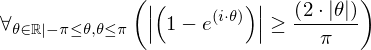

In [22]:
ineqThm3

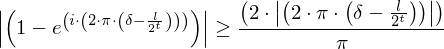

In [23]:
ineqThm3.specialize({theta:X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]})

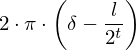

In [17]:
Multiply(two,pi,Subtract(delta,Fraction(l,Exponentiate(two,t))))

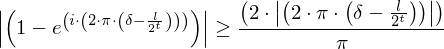

In [24]:
ineqThm3.specialize({theta:X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]}).proven((
    In(X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1],Reals),
    LessThanEquals(Neg(pi),X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]),
    LessThanEquals(X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1],pi)))

In [25]:
assumptions = assumptions.union({In(X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1],Reals),
    LessThanEquals(Neg(pi),X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]),
    LessThanEquals(X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1],pi)})
assumptions

{|alpha(l)| = |(1 - e^((2 * pi * i * ((2^(t) * delta) - l))))| / (2^(t) * |(1 - e^((2 * pi * i * (delta - l / 2^(t)))))|),
 (2 * pi * ((2^(t) * delta) - l)) in Reals,
 (2^(t) * |(1 - e^((i * (2 * pi * (delta - l / 2^(t))))))|) in Reals,
 |(1 - e^((i * (2 * pi * ((2^(t) * delta) - l)))))| in Reals,
 2 in Reals,
 (2^(t) * |(1 - e^((i * (2 * pi * (delta - l / 2^(t))))))|) > 0,
 (2 * pi * (delta - l / 2^(t))) in Reals,
 |alpha(l)| = |(1 - e^((i * (2 * pi * ((2^(t) * delta) - l)))))| / (2^(t) * |(1 - e^((i * (2 * pi * (delta - l / 2^(t))))))|),
 l in Integers,
 t in Naturals,
 delta in Reals,
 -2^((t - 1)) <= l,
 l <= 2^((t - 1)),
 0 <= delta,
 delta <= 2^(-t),
 -pi <= ((2 * pi) * (delta - l / 2^(t))),
 ((2 * pi) * (delta - l / 2^(t))) < pi,
 -pi <= (2 * pi * (delta - l / 2^(t))),
 (2 * pi * (delta - l / 2^(t))) <= pi}

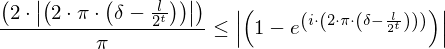

In [26]:
X8 = ineqThm3.specialize({theta:X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]}).proven(
    assumptions).deriveReversed().proven(assumptions)
X8

In [27]:
assumptions = assumptions.union({X8})

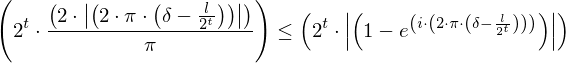

In [28]:
divIneqThm1cor.specialize({a:X8.lhs,c:X8.rhs,b:Exponentiate(two,t)}).proven(assumptions.union(
        {In(X8.lhs,Reals),In(X8.rhs,Reals),In(Exponentiate(two,t),Reals),GreaterThan(Exponentiate(two,t),zero)}))

In [29]:
assumptions = assumptions.union({In(X8.lhs,Reals),In(X8.rhs,Reals),In(Exponentiate(two,t),Reals),GreaterThan(Exponentiate(two,t),zero)})

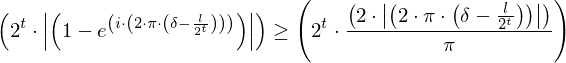

In [30]:
X9 = divIneqThm1cor.specialize({a:X8.lhs,c:X8.rhs,b:Exponentiate(two,t)}).proven(assumptions).deriveReversed().proven(assumptions)
X9.proven(assumptions)

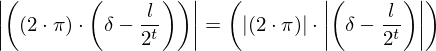

In [31]:
absProdEtc.specialize({Etcetera(a):Multiply(two,pi),Etcetera(b):Subtract(delta,Fraction(l,Exponentiate(two,t)))})

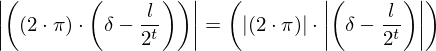

In [38]:
X10 = absProdEtc.specialize({Etcetera(a):Multiply(two,pi),Etcetera(b):Subtract(delta,Fraction(l,Exponentiate(two,t)))})
X10.proven({In(X10.lhs.operand.operands[0],Complexes),In(X10.lhs.operand.operands[1],Complexes)})

In [39]:
assumptions = assumptions.union({In(X10.lhs.operand.operands[0],Complexes),In(X10.lhs.operand.operands[1],Complexes)})

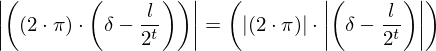

In [86]:
X10.proven(assumptions)

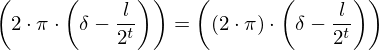

In [78]:
multAssoc.specialize(
    {Etcetera(w):[],Etcetera(x):two,Etcetera(y):pi,Etcetera(z):Subtract(delta,Fraction(l,Exponentiate(two,t)))})

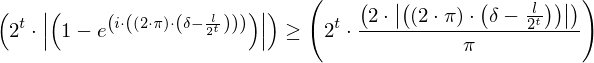

In [81]:
X11 = multAssoc.specialize(
    {Etcetera(w):[],Etcetera(x):two,Etcetera(y):pi,Etcetera(z):Subtract(delta,Fraction(l,Exponentiate(two,t)))}).rhsSubstitute(X9)
X11

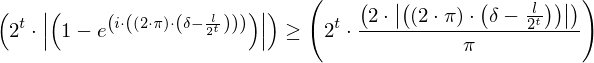

In [88]:
X11.proven(assumptions)

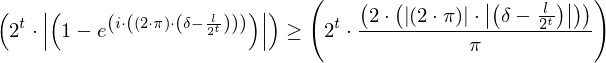

In [89]:
X12 = X10.rhsSubstitute(X11)
X12.proven(assumptions)

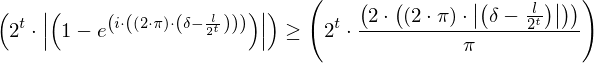

In [92]:
X13 = absPos.specialize({a:X10.rhs.operands[0].operand}).rhsSubstitute(X12)
X13.proven(assumptions)

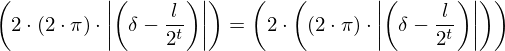

In [97]:
X14 = multAssoc.specialize({Etcetera(w):two,Etcetera(x):Multiply(two,pi),
                     Etcetera(y):Abs(Subtract(delta,Fraction(l,Exponentiate(two,t)))),Etcetera(z):[]})
X14.proven(assumptions)

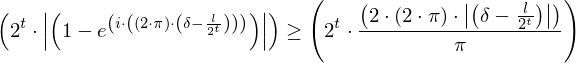

In [98]:
X15 = X14.lhsSubstitute(X13)
X15.proven(assumptions)

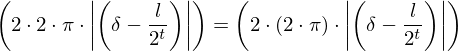

In [100]:
X16 = multAssoc.specialize({Etcetera(w):two,Etcetera(x):two,
                            Etcetera(y):pi,Etcetera(z):Abs(Subtract(delta,Fraction(l,Exponentiate(two,t))))})
X16.proven()

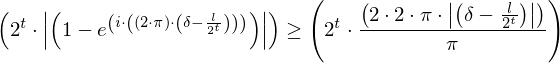

In [103]:
X17 = X16.lhsSubstitute(X15)
X17.proven(assumptions)

In [45]:
absPos.specialize({a:X10.rhs.operands[0].operand})

In [35]:
absTwoPi

In [32]:
absProdEtc.specialize({Etcetera(a):Multiply(two,pi),Etcetera(b):Subtract(delta,Fraction(l,Exponentiate(two,t)))}).rhsSubstitute()

TypeError: rhsSubstitute() takes at least 2 arguments (1 given)

In [43]:
multAssoc

In [46]:
multAssoc.specialize({
        Etcetera(w):[],
        Etcetera(x):Multiply(X9.rhs.operands[1].numerator.operands[1].operand.operands[0],X9.rhs.operands[1].numerator.operands[1].operand.operands[1])})


In [ ]:
ineqThm4a.pro

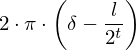

In [17]:
X6 = X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]
X6

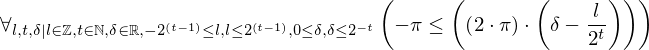

In [19]:
ineqThm4a

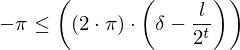

In [20]:
ineqThm4a.specialize({delta:delta,l:l,t:t})

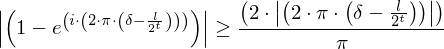

In [23]:
ineqThm3.specialize({theta:X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]})

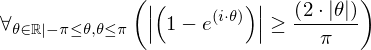

In [28]:
ineqThm3

In [27]:
ineqThm3.specialize({theta:X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1]}).proven(
    {In(X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1],Reals)})

ProofFailure: Proof failed: |(1 - e^((i * (2 * pi * (delta - l / 2^(t))))))| >= (2 * |(2 * pi * (delta - l / 2^(t)))|) / pi assuming {(2 * pi * (delta - l / 2^(t))) in Reals}

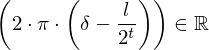

In [26]:
In(X5.rhs.denominator.operands[1].operand.operands[1].exponent.operands[1],Reals)